# Data preparation

## Import of required libraries
Those libraries are used in the notebook to perform the data preparation. Maybee you need to install them first with `pip install <library>`.  

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline


# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical


pd.set_option('display.max_colwidth', 100)

c:\Users\olive\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First I want to import the file

In [4]:
all_data_df = pd.read_csv('../01_Kontext/10_datasource/cyberbullying_tweets.csv')
all_data_df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying


In [5]:
all_data_df.shape

(47692, 2)

In [6]:
all_data_df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [7]:
all_data_df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying


As next we should check if there are some missing values or not.

In [8]:
count = all_data_df.isna().sum()
precentange = all_data_df.isna().mean().round(4) * 100

dfMissing = pd.DataFrame({'count': count, 'precentange': precentange})
dfMissing.sort_values('count', ascending=False)

,count,precentange
tweet_text,0,0.0
cyberbullying_type,0,0.0


In [9]:
all_data_df.groupby(['cyberbullying_type'])['cyberbullying_type'].describe()[['count']]

,count
cyberbullying_type,
age,7992
ethnicity,7961
gender,7973
not_cyberbullying,7945
other_cyberbullying,7823
religion,7998


In [10]:
#calculate length of the comment
all_data_df['length'] = all_data_df['tweet_text'].apply(len)
all_data_df.head()

,tweet_text,cyberbullying_type,length
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,115
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,103
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,103


In [11]:
temp = all_data_df.groupby('cyberbullying_type').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,cyberbullying_type,tweet_text
5,religion,7998
0,age,7992
2,gender,7973
1,ethnicity,7961
3,not_cyberbullying,7945
4,other_cyberbullying,7823


findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

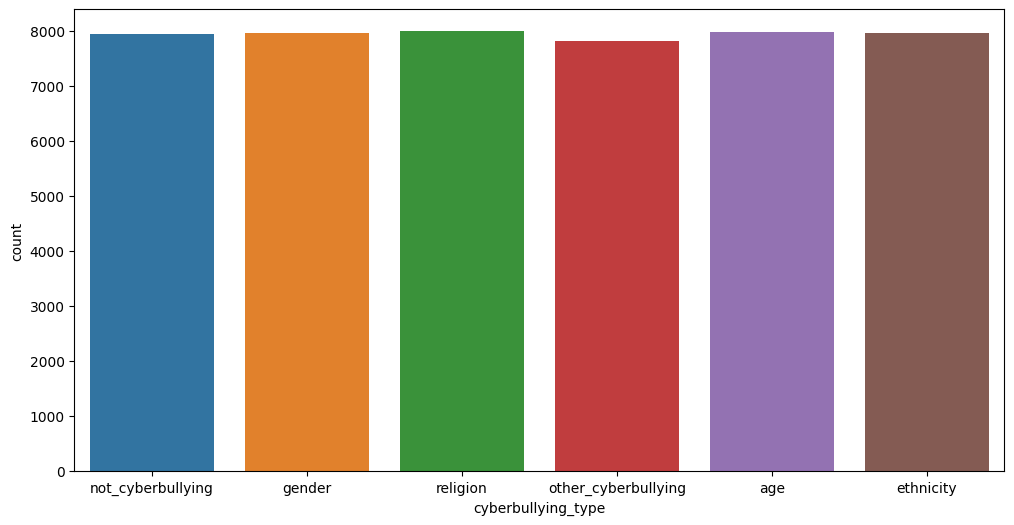

In [33]:
from plotly import graph_objs as go
plt.figure(figsize=(12,6))
sns.countplot(x='cyberbullying_type',data=all_data_df)
fig.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'ethnicity'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'not_cyberbullying'}>],
       [<Axes: title={'center': 'other_cyberbullying'}>,
        <Axes: title={'center': 'religion'}>]], dtype=object)

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

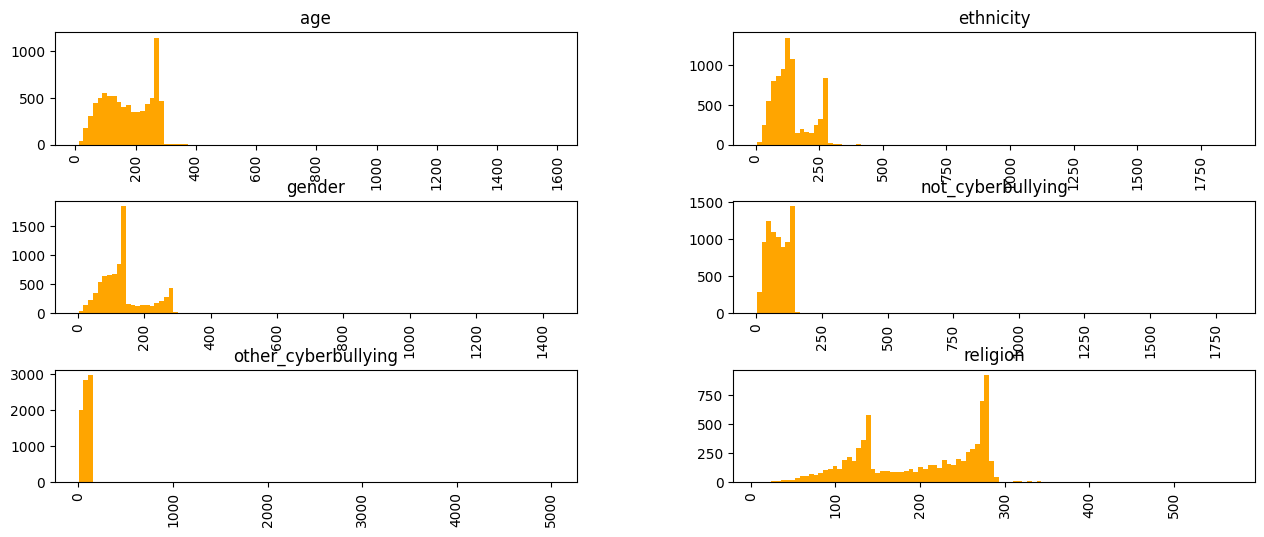

In [32]:
all_data_df.hist(column='length',by='cyberbullying_type',figsize=(15,6), bins=100,color='orange')

In [14]:
exclude = set(",.:;'\"-?!/´`%")
def removePunctuation(txt):
    return ''.join([(c if c not in exclude else " ") for c in txt])
    
def removeNumbers(txt):
    return ''.join(c for c in txt if not c.isnumeric())

In [15]:
all_data_df['cleaned'] = all_data_df['tweet_text'].apply(lambda x: removePunctuation(x))
all_data_df.head()

,tweet_text,cyberbullying_type,length,cleaned
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,In other words #katandandre your food was crapilicious #mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,115,Why is #aussietv so white #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,@XochitlSuckkks a classy whore Or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,103,@Jason_Gio meh P thanks for the heads up but not too concerned about another angry dude on t...
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,103,@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account Like Islam it is al...


In [16]:
all_data_df['cleaned'] = all_data_df['cleaned'].apply(lambda x: removeNumbers(x))
all_data_df.head()

,tweet_text,cyberbullying_type,length,cleaned
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,In other words #katandandre your food was crapilicious #mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,115,Why is #aussietv so white #MKR #theblock #ImACelebrityAU #today #sunrise #studio #Neighbours #W...
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,@XochitlSuckkks a classy whore Or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,103,@Jason_Gio meh P thanks for the heads up but not too concerned about another angry dude on t...
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,103,@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account Like Islam it is al...


In [17]:
from collections import Counter

plt.rc('font', family='Lohit Devanagari')

results = Counter()
all_data_df.cleaned.str.split().apply(results.update)

most = results.most_common()
print(most[:10])

[('the', 27757), ('a', 23523), ('to', 22968), ('and', 19856), ('I', 19714), ('you', 16292), ('of', 15115), ('in', 14240), ('is', 13558), ('that', 11642)]


In [20]:
all_data_df.head()

,tweet_text,cyberbullying_type,length,cleaned
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,In other words #katandandre your food was crapilicious #mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,115,Why is #aussietv so white #MKR #theblock #ImACelebrityAU #today #sunrise #studio #Neighbours #W...
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,@XochitlSuckkks a classy whore Or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,103,@Jason_Gio meh P thanks for the heads up but not too concerned about another angry dude on t...
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,103,@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account Like Islam it is al...


In [21]:
import re,string,unicodedata
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from collections import Counter
import string

import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.pipeline import Pipeline

In [22]:
# Name of the BERT model to use
model_name = 'bert-base-uncased'

# Max length of tokens
max_length = 128

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
#config.output_hidden_states = False

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)
bert = TFAutoModel.from_pretrained(model_name)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [23]:
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32') 
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
x = bert.bert(inputs)

In [24]:
all_data_df

,tweet_text,cyberbullying_type,length,cleaned
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,In other words #katandandre your food was crapilicious #mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,115,Why is #aussietv so white #MKR #theblock #ImACelebrityAU #today #sunrise #studio #Neighbours #W...
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,@XochitlSuckkks a classy whore Or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,103,@Jason_Gio meh P thanks for the heads up but not too concerned about another angry dude on t...
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,103,@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account Like Islam it is al...
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, wor...",ethnicity,234,Black ppl aren t expected to do anything depended on for anything Yet free to participate wor...
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of n...,ethnicity,276,Turner did not withhold his disappointment Turner called the court an “abominable conclave of n...
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&l...,ethnicity,104,I swear to God This dumb nigger bitch I have got to bleach my hair reeeeeal fuckin soon D &l...
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity,90,Yea fuck you RT @therealexel IF YOURE A NIGGER FUCKING UNFOLLOW ME FUCKING DUMB NIGGERS


In [25]:
df_la = pd.get_dummies(all_data_df, columns = ['cyberbullying_type'])
df_la

,tweet_text,length,cleaned,cyberbullying_type_age,cyberbullying_type_ethnicity,cyberbullying_type_gender,cyberbullying_type_not_cyberbullying,cyberbullying_type_other_cyberbullying,cyberbullying_type_religion
0,"In other words #katandandre, your food was crapilicious! #mkr",61,In other words #katandandre your food was crapilicious #mkr,0,0,0,1,0,0
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,115,Why is #aussietv so white #MKR #theblock #ImACelebrityAU #today #sunrise #studio #Neighbours #W...,0,0,0,1,0,0
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,60,@XochitlSuckkks a classy whore Or more red velvet cupcakes,0,0,0,1,0,0
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",103,@Jason_Gio meh P thanks for the heads up but not too concerned about another angry dude on t...,0,0,0,1,0,0
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",103,@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account Like Islam it is al...,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, wor...",234,Black ppl aren t expected to do anything depended on for anything Yet free to participate wor...,0,1,0,0,0,0
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of n...,276,Turner did not withhold his disappointment Turner called the court an “abominable conclave of n...,0,1,0,0,0,0
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&l...,104,I swear to God This dumb nigger bitch I have got to bleach my hair reeeeeal fuckin soon D &l...,0,1,0,0,0,0
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",90,Yea fuck you RT @therealexel IF YOURE A NIGGER FUCKING UNFOLLOW ME FUCKING DUMB NIGGERS,0,1,0,0,0,0


In [26]:
train_sentences = all_data_df["cleaned"].values
list_classes = ['cyberbullying_type_age','cyberbullying_type_ethnicity','cyberbullying_type_gender','cyberbullying_type_not_cyberbullying','cyberbullying_type_other_cyberbullying','cyberbullying_type_religion']
train_y = df_la[list_classes].values

In [27]:
#x2 =Dense(512, activation='relu')(x[1])
x2 = GlobalAveragePooling1D()(x[0])
#x3 = Dropout(0.5)(x2)
y =Dense(len(list_classes), activation='sigmoid', name='outputs')(x2)

model = Model(inputs=inputs, outputs=y)
#model.layers[2].trainable = False

# Take a look at the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['attention_mask[0][0]',         
                                thPoolingAndCrossAt               'input_ids[0][0]']              
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [28]:
from tensorflow.keras.optimizers import Adam

# Verwende den neuen Adam-Optimizer mit learning_rate
optimizer = Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [29]:
# Tokenize the input 
x = tokenizer(
    text=list(train_sentences),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [31]:
history = model.fit(
    x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    #x={'input_ids': x['input_ids']},
    y={'outputs': train_y},
    validation_split=0.5,
    batch_size=32,
    epochs=1)

746/746 [==============================] - 50200s 67s/step - loss: 0.0933 - accuracy: 0.8914 - val_loss: 1.7016 - val_accuracy: 0.0028


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data_df['cleaned'], all_data_df['cyberbullying_type'],
                                                    test_size = 0.2, random_state = 42)
print(f'Data Split done.')

Data Split done.


In [36]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectorizer.fit(X_train)
print(f'Vectorizer fitted.')
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

Vectorizer fitted.
No. of feature_words:  391545


In [37]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [38]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    cm=confusion_matrix(y_pred , y_test)
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative',  'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Positive'], fontsize=16)
    plt.show()

**Decision Tree Classifier

                     precision    recall  f1-score   support

                age       0.98      0.97      0.97      1603
          ethnicity       0.98      0.97      0.97      1603
             gender       0.83      0.82      0.83      1531
  not_cyberbullying       0.47      0.51      0.49      1624
other_cyberbullying       0.49      0.49      0.49      1612
           religion       0.95      0.91      0.93      1566

           accuracy                           0.78      9539
          macro avg       0.78      0.78      0.78      9539
       weighted avg       0.78      0.78      0.78      9539



<Figure size 640x480 with 0 Axes>

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

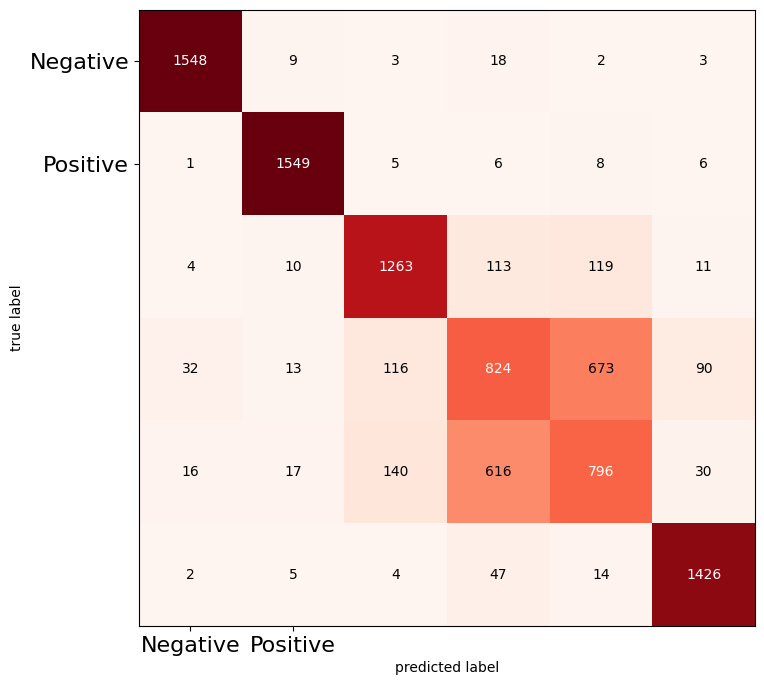

In [39]:
from sklearn.metrics import roc_curve, auc
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)
model_Evaluate(dtc)

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

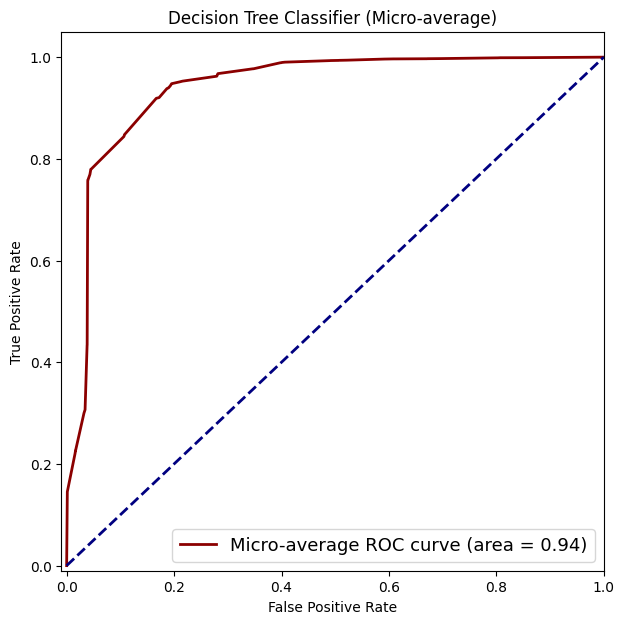

In [45]:
from sklearn.preprocessing import label_binarize

# Annahme: dtc ist Ihr Decision Tree Classifier-Modell
classifier = OneVsOneClassifier(dtc)
classifier.fit(X_train, y_train)

# Binarisieren Sie die multiklassen Labels für die Testdaten
y_test_bin = label_binarize(y_test, classes=classifier.classes_)

# Berechnung der ROC-Kurve für jede Klasse
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plotting
plt.figure(figsize=(7, 7))
plt.plot(fpr_micro, tpr_micro, color='darkred', lw=2, label='Micro-average ROC curve (area = {:0.2f})'.format(roc_auc_micro))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier (Micro-average)')
plt.legend(loc='lower right', fontsize=13)
plt.show()

Logistic Regression

                     precision    recall  f1-score   support

                age       0.93      0.99      0.96      1603
          ethnicity       0.97      0.97      0.97      1603
             gender       0.89      0.84      0.86      1531
  not_cyberbullying       0.59      0.52      0.55      1624
other_cyberbullying       0.60      0.64      0.62      1612
           religion       0.91      0.96      0.93      1566

           accuracy                           0.82      9539
          macro avg       0.82      0.82      0.82      9539
       weighted avg       0.81      0.82      0.81      9539



<Figure size 640x480 with 0 Axes>

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

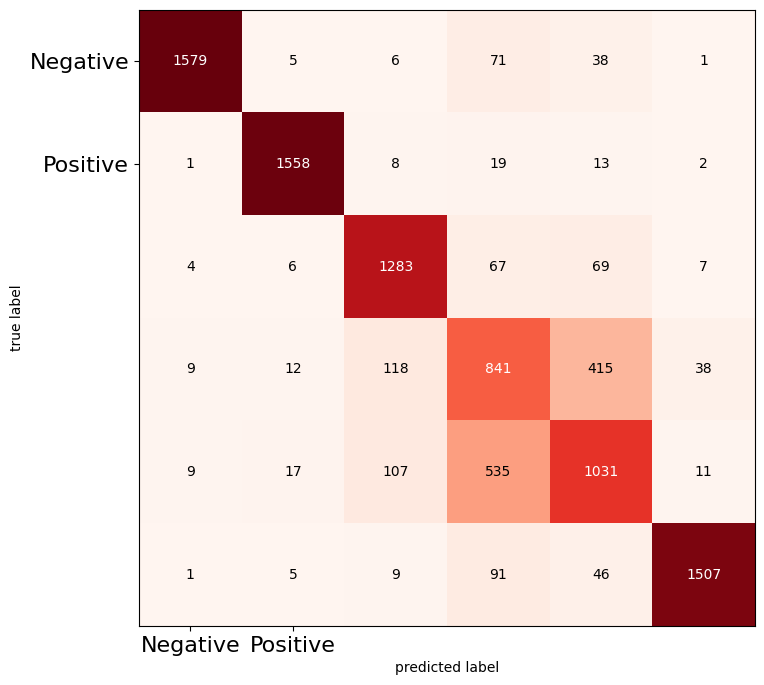

In [46]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
model_Evaluate(lr)

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

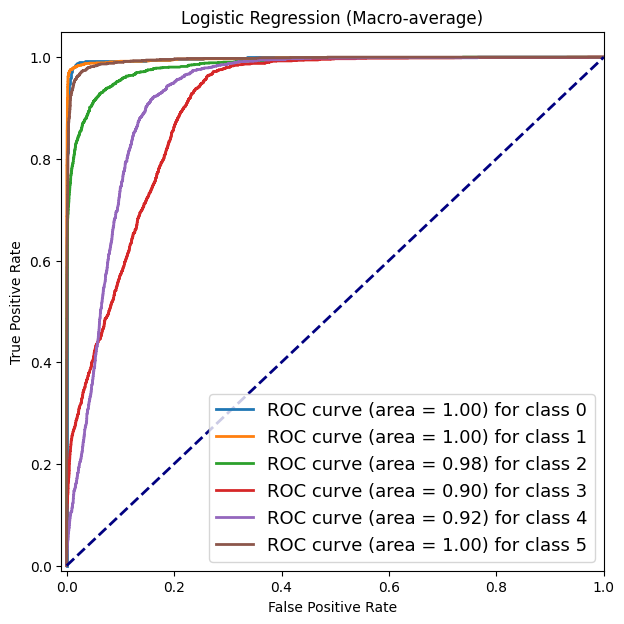

In [49]:
from sklearn.metrics import roc_curve, auc

# Annahme: lr ist Ihr Logistic Regression-Modell
y_score = lr.predict_proba(X_test)

# Binarisieren Sie die multiklassen Labels für die Testdaten
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=lr.classes_)

# Berechnung der Makro-Durchschnitt-ROC-Kurve
fpr_macro = dict()
tpr_macro = dict()
roc_auc_macro = dict()

for i in range(len(lr.classes_)):
    fpr_macro[i], tpr_macro[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_macro[i] = auc(fpr_macro[i], tpr_macro[i])

# Plotting
plt.figure(figsize=(7, 7))
for i in range(len(lr.classes_)):
    plt.plot(fpr_macro[i], tpr_macro[i], lw=2, label='ROC curve (area = {:0.2f}) for class {}'.format(roc_auc_macro[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (Macro-average)')
plt.legend(loc='lower right', fontsize=13)
plt.show()

KNeighbors Clssifier

                     precision    recall  f1-score   support

                age       1.00      0.03      0.07      1603
          ethnicity       1.00      0.14      0.25      1603
             gender       0.87      0.06      0.11      1531
  not_cyberbullying       0.83      0.02      0.05      1624
other_cyberbullying       0.18      0.99      0.30      1612
           religion       0.94      0.01      0.02      1566

           accuracy                           0.21      9539
          macro avg       0.80      0.21      0.13      9539
       weighted avg       0.80      0.21      0.13      9539



<Figure size 640x480 with 0 Axes>

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

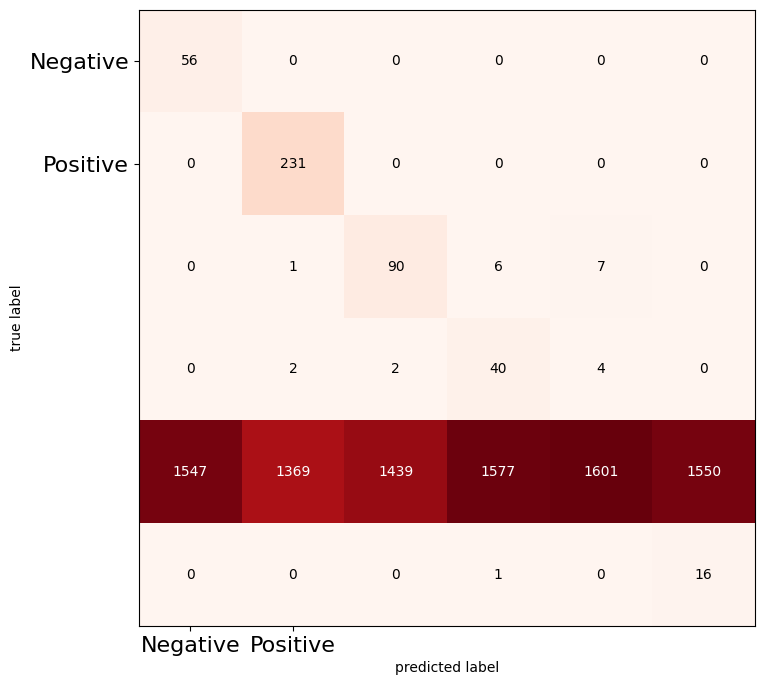

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

model_Evaluate(knn)

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

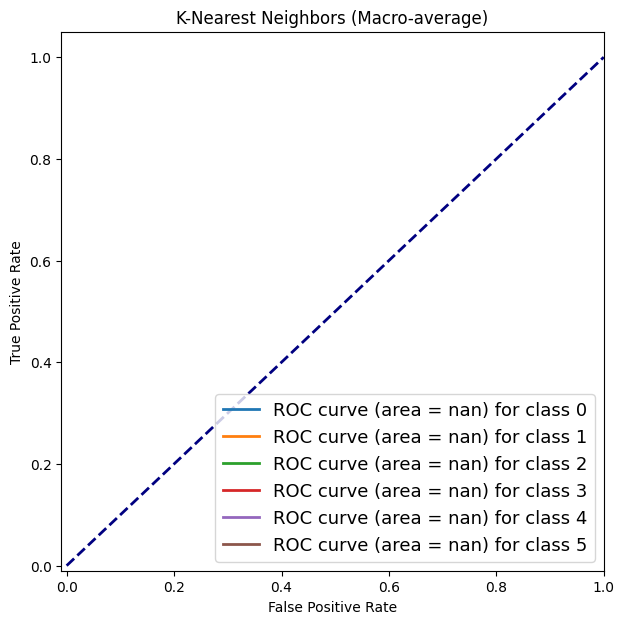

In [54]:
from sklearn.metrics import roc_curve, auc

# Annahme: knn ist Ihr K-Nearest Neighbors-Modell
y_score = knn.predict_proba(X_test)

# Binarisieren Sie die multiklassen Labels für die Testdaten
from sklearn.preprocessing import label_binarize
import numpy as np

n_classes = len(np.unique(y_test))  # Annahme: Sie verwenden NumPy für y_test
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Berechnung der Makro-Durchschnitt-ROC-Kurve
fpr_macro = dict()
tpr_macro = dict()
roc_auc_macro = dict()

for i in range(n_classes):
    fpr_macro[i], tpr_macro[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_macro[i] = auc(fpr_macro[i], tpr_macro[i])

# Plotting
plt.figure(figsize=(7, 7))
for i in range(n_classes):
    plt.plot(fpr_macro[i], tpr_macro[i], lw=2, label='ROC curve (area = {:0.2f}) for class {}'.format(roc_auc_macro[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors (Macro-average)')
plt.legend(loc='lower right', fontsize=13)
plt.show()


AdaBoost Classifier

                     precision    recall  f1-score   support

                age       0.96      0.98      0.97      1603
          ethnicity       0.99      0.94      0.96      1603
             gender       0.95      0.73      0.83      1531
  not_cyberbullying       0.60      0.37      0.46      1624
other_cyberbullying       0.51      0.84      0.64      1612
           religion       0.95      0.92      0.94      1566

           accuracy                           0.80      9539
          macro avg       0.83      0.80      0.80      9539
       weighted avg       0.82      0.80      0.80      9539



<Figure size 640x480 with 0 Axes>

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

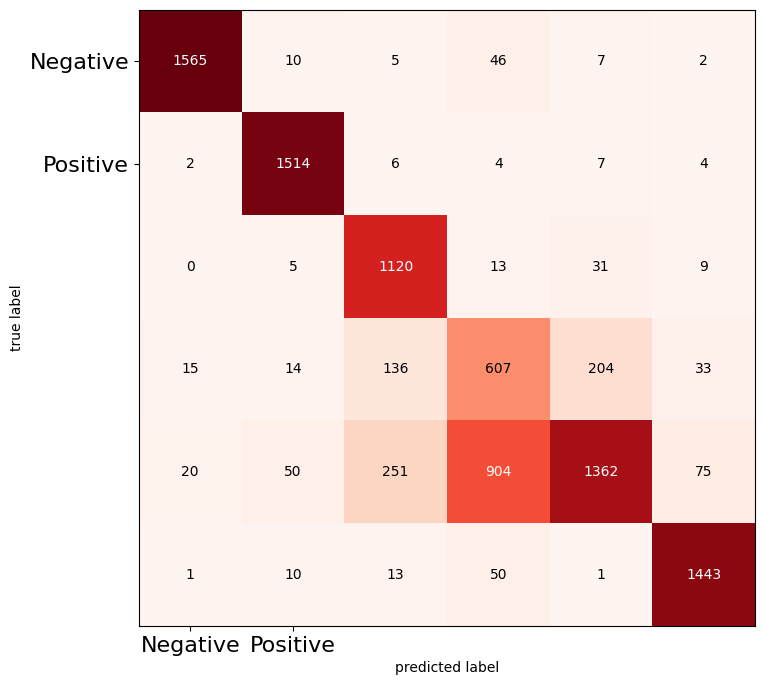

In [55]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
model_Evaluate(abc)

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

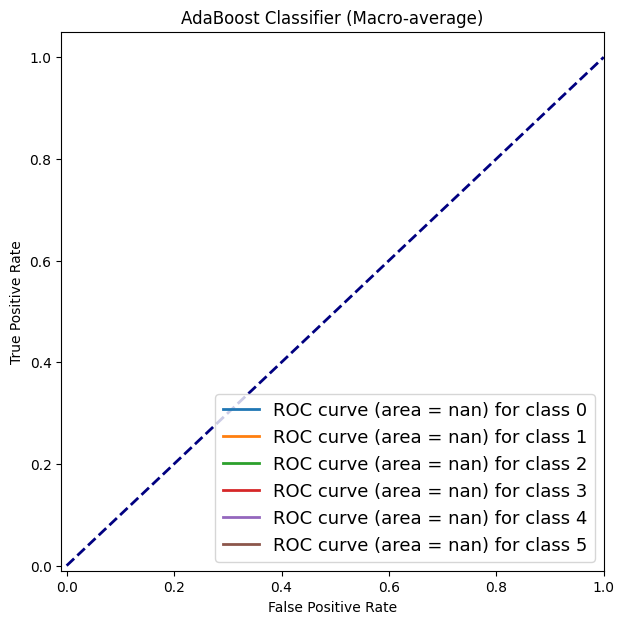

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Annahme: abc ist Ihr AdaBoost Classifier-Modell
y_score = abc.predict_proba(X_test)

# Binarisieren Sie die multiklassen Labels für die Testdaten
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Berechnung der Mikro-Durchschnitt-ROC-Kurve
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Berechnung der Makro-Durchschnitt-ROC-Kurve
fpr_macro = dict()
tpr_macro = dict()
roc_auc_macro = dict()

for i in range(n_classes):
    fpr_macro[i], tpr_macro[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_macro[i] = auc(fpr_macro[i], tpr_macro[i])

# Plotting
plt.figure(figsize=(7, 7))
for i in range(n_classes):
    plt.plot(fpr_macro[i], tpr_macro[i], lw=2, label='ROC curve (area = {:0.2f}) for class {}'.format(roc_auc_macro[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier (Macro-average)')
plt.legend(loc='lower right', fontsize=13)
plt.show()

MultiNomial NB

                     precision    recall  f1-score   support

                age       0.62      0.99      0.76      1603
          ethnicity       0.88      0.86      0.87      1603
             gender       0.80      0.84      0.82      1531
  not_cyberbullying       0.63      0.30      0.41      1624
other_cyberbullying       0.60      0.31      0.41      1612
           religion       0.71      0.98      0.82      1566

           accuracy                           0.71      9539
          macro avg       0.71      0.72      0.68      9539
       weighted avg       0.70      0.71      0.68      9539



<Figure size 640x480 with 0 Axes>

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

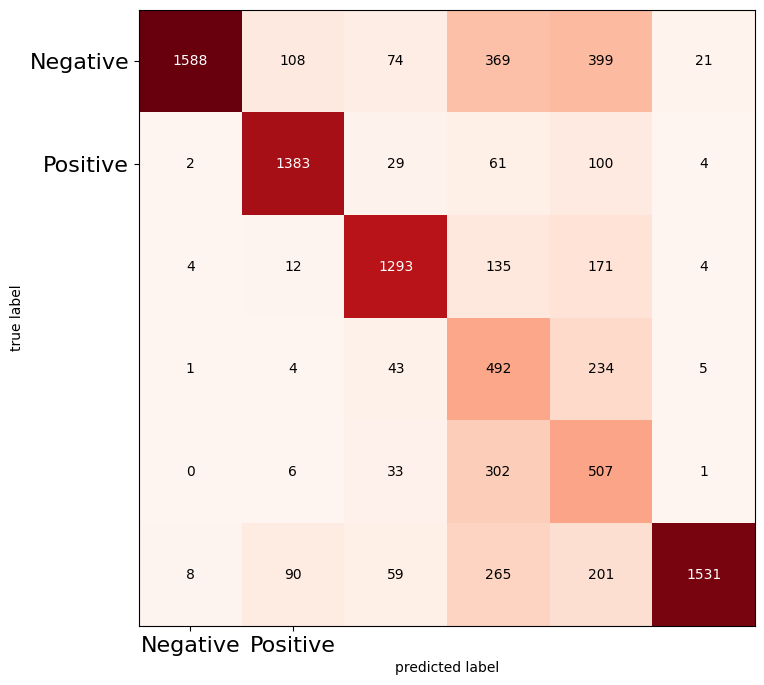

In [59]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
model_Evaluate(mnb)

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

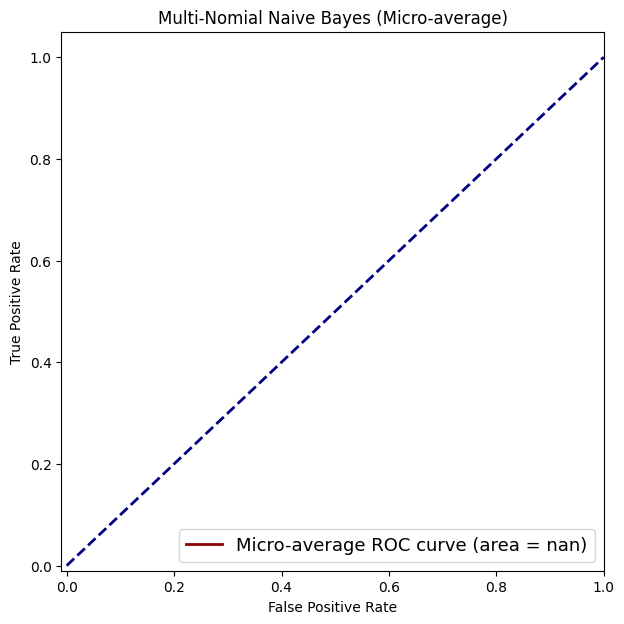

In [61]:
from sklearn.metrics import roc_curve, auc

# Annahme: mnb ist Ihr Multi-Nomial Naive Bayes-Modell
y_score = mnb.predict_proba(X_test)

# Binarisieren Sie die multiklassen Labels für die Testdaten
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Berechnung der Mikro-Durchschnitt-ROC-Kurve
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plotting
f, axes = plt.subplots(1, 1, figsize=(7, 7))
axes.plot(fpr_micro, tpr_micro, color='darkred', lw=2, label='Micro-average ROC curve (area = {:0.2f})'.format(roc_auc_micro))
axes.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes.set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='Multi-Nomial Naive Bayes (Micro-average)')
axes.legend(loc='lower right', fontsize=13)
plt.show()

Gradient Boosting Classifier

                     precision    recall  f1-score   support

                age       0.98      0.98      0.98      1603
          ethnicity       0.99      0.98      0.98      1603
             gender       0.92      0.81      0.86      1531
  not_cyberbullying       0.71      0.43      0.53      1624
other_cyberbullying       0.55      0.88      0.68      1612
           religion       0.98      0.92      0.95      1566

           accuracy                           0.83      9539
          macro avg       0.86      0.83      0.83      9539
       weighted avg       0.85      0.83      0.83      9539



<Figure size 640x480 with 0 Axes>

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

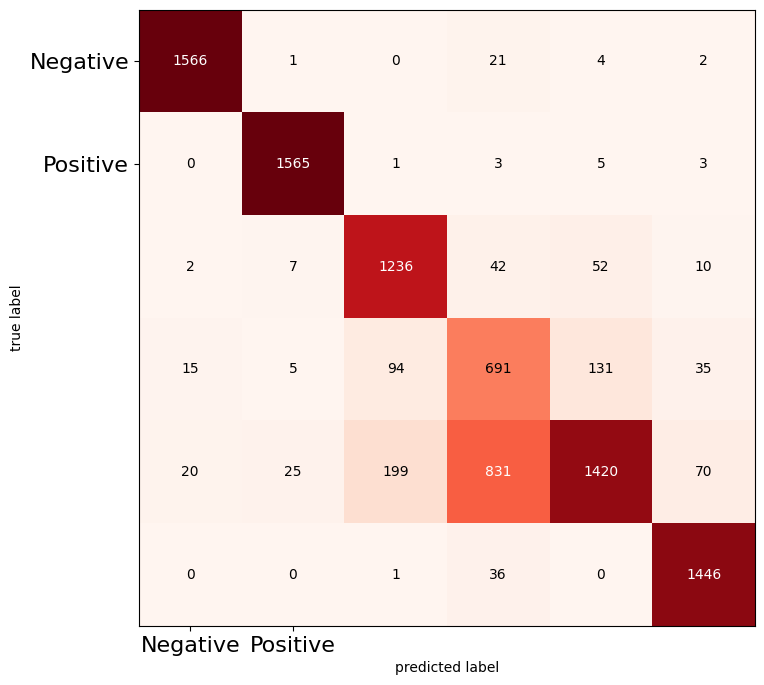

In [62]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
model_Evaluate(gbc)

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

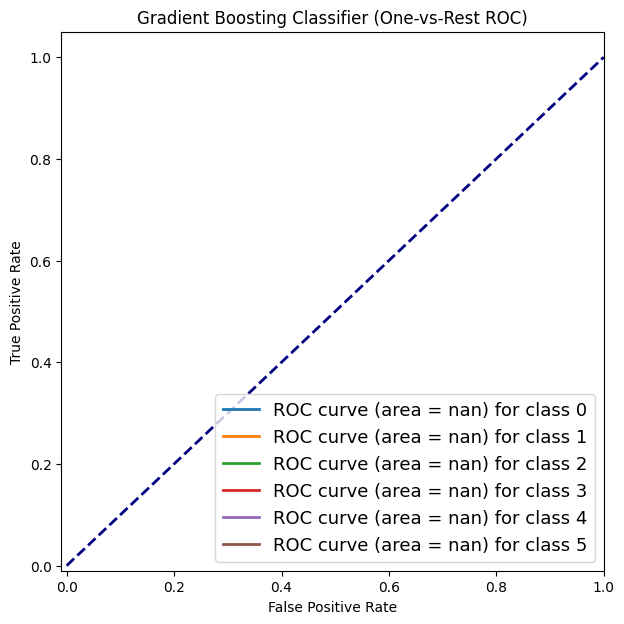

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Annahme: gbc ist Ihr Gradient Boosting Classifier-Modell
model = OneVsRestClassifier(GradientBoostingClassifier())
y_score = model.fit(X_train, y_train).decision_function(X_test)

# Binarisieren Sie die multiklassen Labels für die Testdaten
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Berechnung der ROC-Kurve für jede Klasse
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(7, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:0.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier (One-vs-Rest ROC)')
plt.legend(loc='lower right', fontsize=13)
plt.show()


Random Forest Clssifier

                     precision    recall  f1-score   support

                age       0.96      0.98      0.97      1603
          ethnicity       0.98      0.97      0.97      1603
             gender       0.91      0.77      0.84      1531
  not_cyberbullying       0.55      0.48      0.51      1624
other_cyberbullying       0.51      0.66      0.58      1612
           religion       0.95      0.94      0.94      1566

           accuracy                           0.80      9539
          macro avg       0.81      0.80      0.80      9539
       weighted avg       0.81      0.80      0.80      9539



<Figure size 640x480 with 0 Axes>

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

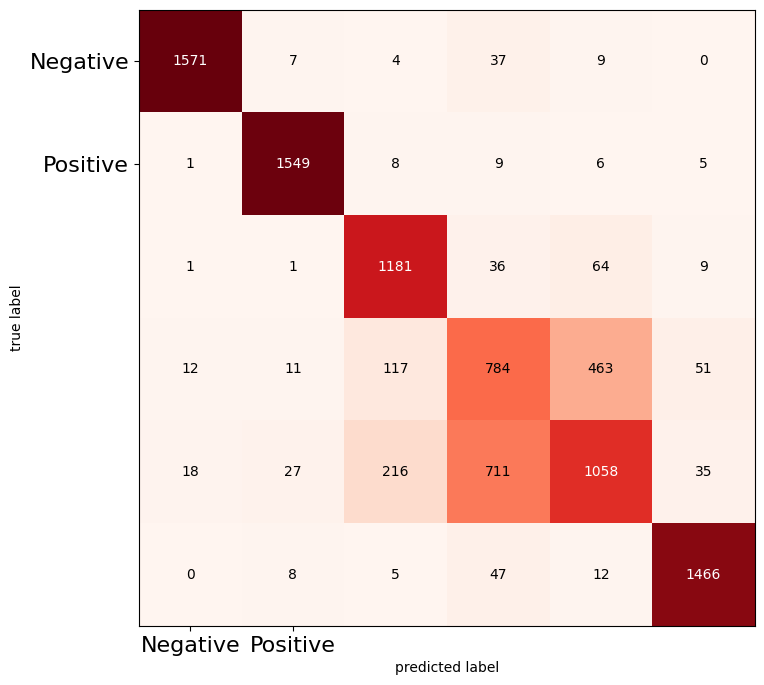

In [65]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(random_state=42)

rfc.fit(X_train,y_train)

model_Evaluate(rfc)

In [66]:
pred_rfc = rfc.predict_proba(X_test)[:,1]
fpr_rfc,tpr_rfc,_ = roc_curve(y_test.values,pred_rfc)
roc_auc_rfc = auc(fpr_rfc,tpr_rfc)


f, axes = plt.subplots(1, 1,figsize=(7,7))
axes.plot(fpr_rfc, tpr_rfc, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_rfc))
axes.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes.set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes.set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Random Forest Classifer')
axes.legend(loc='lower right', fontsize=13)

ValueError: multiclass format is not supported

SVC

                     precision    recall  f1-score   support

                age       0.94      0.98      0.96      1603
          ethnicity       0.98      0.97      0.98      1603
             gender       0.91      0.82      0.86      1531
  not_cyberbullying       0.59      0.48      0.53      1624
other_cyberbullying       0.56      0.67      0.61      1612
           religion       0.93      0.95      0.94      1566

           accuracy                           0.81      9539
          macro avg       0.82      0.81      0.81      9539
       weighted avg       0.81      0.81      0.81      9539



<Figure size 640x480 with 0 Axes>

findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Font family 'Lohit Devanagari' not found.
findfont: Fo

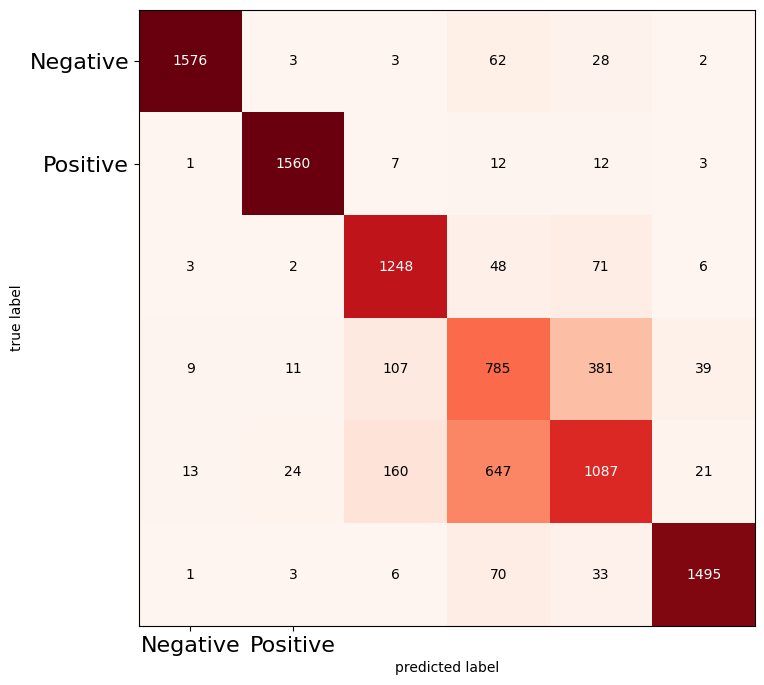

In [67]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
model_Evaluate(svm)

In [ ]:
all_data_df.to_csv('../Projectwork-master/20_model_evaluation/20_cleaned_data.csv')

The next Notebook will be 02_data_analysis.